#**Cerinta 1**
Folsind datele aferente anului 2017 (fisierul v1_world-happiness-report-2017.csv), să se realizeze o predicție a gradului de fericire în funcție:

a.doar de caracteristica "Family" (tema)

In [ ]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [ ]:
def loadData(fileName, inputVariable, outputVariable):
    data = []
    columns = []
    with open(fileName) as file:
        reader = csv.reader(file, delimiter=',')
        nrLines = 0
        for row in reader:
            if nrLines == 0:
                columns = row
            else:
                data.append(row)
            nrLines += 1
        nrLines -= 1  # Decrement nrLines by 1 to exclude the header row

    allColumns = inputVariable.split(',')
    inputs = []
    for row_idx in range(nrLines):  # Iterate over each row in the dataset
        row_data = []
        for column in allColumns:  # Iterate over each specified input column
            value = data[row_idx][columns.index(column)]
            if value:  # Check if the value is not empty
                row_data.append(float(value))
            else:
                row_data.append(0.0)  # Replace missing values with 0.0 or handle them appropriately
        inputs.append(row_data)

    selectedOutput = columns.index(outputVariable)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs


In [ ]:
def plotHistogram(x,variableName):
  n,bins,patches = plt.hist(x, 10)
  plt.title('Histogram of ' + variableName)
  plt.show()

In [ ]:
#we check the liniarity between the data
def checkLiniarity(inputs, outputs):
  plt.plot(inputs, outputs, 'ro')
  plt.xlabel('happiness')
  plt.title('Family vs. happiness')
  plt.show()

In [ ]:
#splitting the data into training data and validation data
#we use the training set to train the model and the testing one for validation

def splitData(inputs, outputs):
  np.random.seed(5)
  indexes = [i for i in range(len(inputs))] # creates a list of indexes in the input
  trainSet = np.random.choice(indexes, int(0.8*len(inputs)), replace = False) #creates a list with some random indexes in the list
  validationSet = [i for i in indexes if not i in trainSet] #what was left behind in the selection for the training set
  trainInputs = [inputs[i] for i in trainSet] #selects the input instances that correspond with the random indexes in the training set
  trainOutputs = [outputs[i] for i in trainSet] #same shit here
  validationInputs = [inputs[i] for i in validationSet]
  valdationOutputs = [outputs[i] for i in validationSet]
  return trainInputs, trainOutputs, validationInputs, valdationOutputs

In [ ]:
#plotting the whole thing
def plotting(trainInputs, trainOutputs, validationInputs, valdationOutputs):
  plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')   #train data are plotted by red and circle sign
  plt.plot(validationInputs,valdationOutputs, 'g^', label = 'validation data')     #test data are plotted by green and a triangle sign
  plt.title('train and validation data')
  plt.xlabel('Family')
  plt.ylabel('happiness')
  plt.legend()
  plt.show()

In [ ]:
#we initialize and train out own model
#after that, we use our trained model to predict the output for the given input
def modelTraining(trainInputs, trainOutputs):
  trainInputs_array = np.array(trainInputs)
  trainInputs_reshaped = trainInputs_array.reshape(-1, len(trainInputs[0]))
  regressor = linear_model.LinearRegression() #initializing the model
  regressor.fit(trainInputs_reshaped, trainOutputs) #actually training the model with the given inputs and predicted outputs
  w0, w1 = regressor.intercept_, regressor.coef_[0] #saving the coefficients for my future model(function)
  print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')
  return w0, w1, regressor


In [ ]:
#we just plot the results
#we get some random inputs and the outputs that will be calculated by our trained model

def liniarGraphRepresentation(trainInputs, trainOutputs, w0, w1):
    nrPoints = 1000
    xRef = []
    min_val = min([min(inner) for inner in trainInputs])
    max_val = max([max(inner) for inner in trainInputs])
    step = (max_val - min_val) / nrPoints
    val = min_val
    for i in range(nrPoints):
        xRef.append(val)
        val += step
    yRef = [w0 + w1 * el for el in xRef]

    plt.plot(trainInputs, trainOutputs, 'ro', label='training data')  # train data are plotted by red and circle sign
    plt.plot(xRef, yRef, 'b-', label='learnt model')  # model is plotted by a blue line
    plt.title('train data and the learnt model')
    plt.xlabel('family')
    plt.ylabel('happiness')
    plt.legend()
    plt.show()

# def liniarGraphRepresentation(trainInputs, trainOutputs, w0, w1):
#   nrPoints = 1000
#   xRef = np.linspace(min(trainInputs), max(trainInputs), nrPoints)

#   # Calculate corresponding y values using the learned model
#   yRef = [w0 + w1 * el for el in xRef]

#   plt.plot(trainInputs, trainOutputs, 'ro', label='Training data')  # Plot training data
#   plt.plot(xRef, yRef, 'b-', label='Learned model')                # Plot learned model
#   plt.title('Training data and the learned model')
#   plt.xlabel('Family')
#   plt.ylabel('Happiness')

#   # Adjust y-axis limits to ensure visibility of the line
#   plt.ylim(min(trainOutputs), max(trainOutputs))

#   plt.legend()  # Add grid for better visualization
#   plt.show()

In [ ]:
def plotComputedOutputs(validationInputs, valdationOutputs, regressor):
    trainInputs_array = np.array(validationInputs)
    # Reshape the input data to ensure it's a 2D array
    trainInputs_reshaped = trainInputs_array.reshape(-1, len(validationInputs[0]))
    computedValidationOutputs = regressor.predict(trainInputs_reshaped)
    # Plot the computed outputs and real outputs
    plt.plot(validationInputs, computedValidationOutputs, 'yo', label='Computed test data')  # Computed test data plotted as yellow circles
    plt.plot(validationInputs, valdationOutputs, 'yo', label='Real test data', marker='^', color='g')  # Real test data plotted as green triangles
    plt.title('Computed validation and real validation data')
    plt.xlabel('Family')
    plt.ylabel('Happiness')
    plt.legend()
    plt.show()
    return computedValidationOutputs

In [ ]:
def meanSquareError(computedValidationOutputs, valdationOutputs):
  #mean squared error calculated manually
  error = 0.0
  for t1,t2 in zip(computedValidationOutputs, valdationOutputs):
    error += (t1-t2)**2
  error = error/len(valdationOutputs)
  print('prediction error: ', error)


in:   [[1.616463184, 0.635422587], [1.482383013, 0.626006722], [1.48063302, 0.627162635], [1.564979553, 0.620070577], [1.443571925, 0.617950857]]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


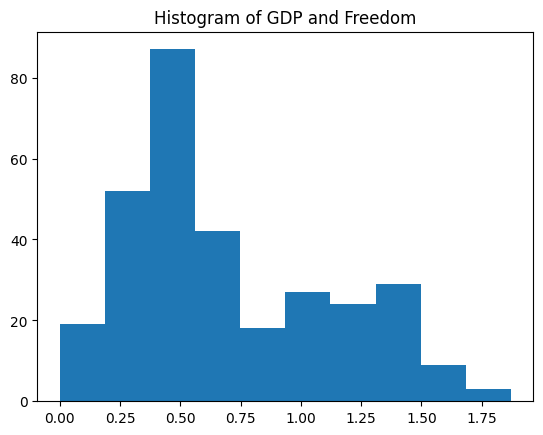

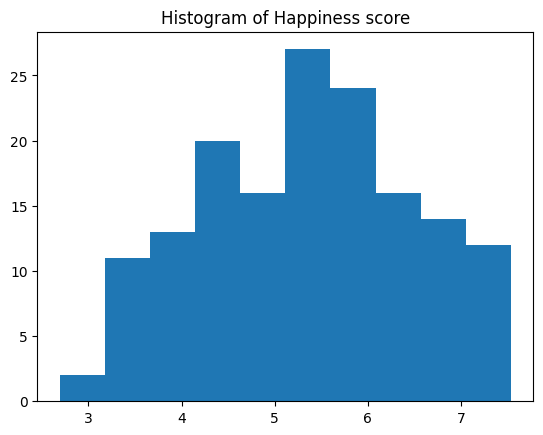

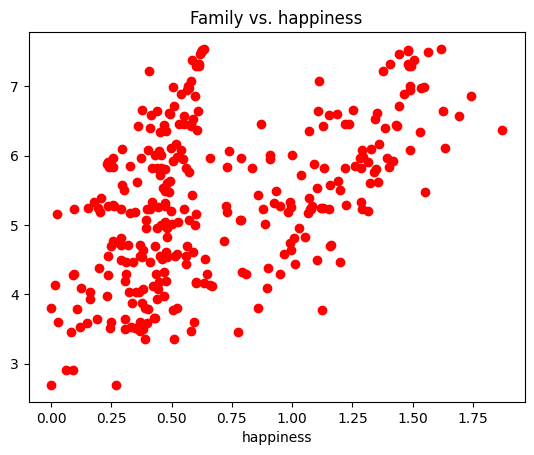

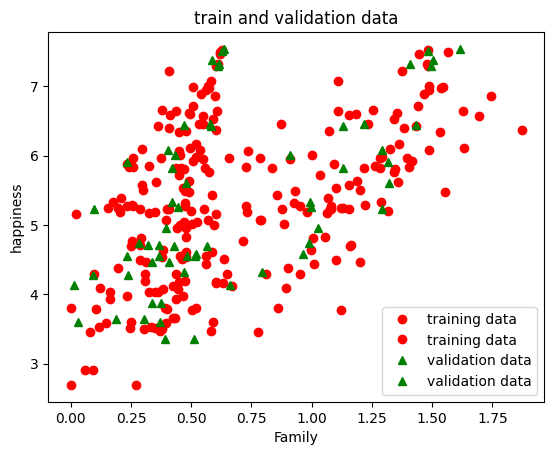

the learnt model: f(x) =  2.5283663169529045  +  1.8763387360090584  * x


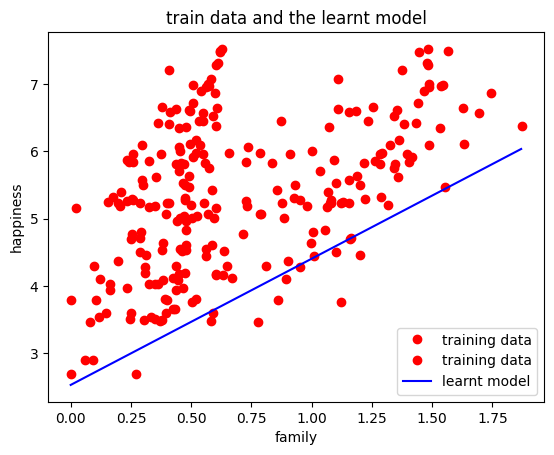

<ipython-input-27-23fdd1447a90>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "yo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(validationInputs, valdationOutputs, 'yo', label='Real test data', marker='^', color='g')  # Real test data plotted as green triangles
<ipython-input-27-23fdd1447a90>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "yo" (-> color='y'). The keyword argument will take precedence.
  plt.plot(validationInputs, valdationOutputs, 'yo', label='Real test data', marker='^', color='g')  # Real test data plotted as green triangles


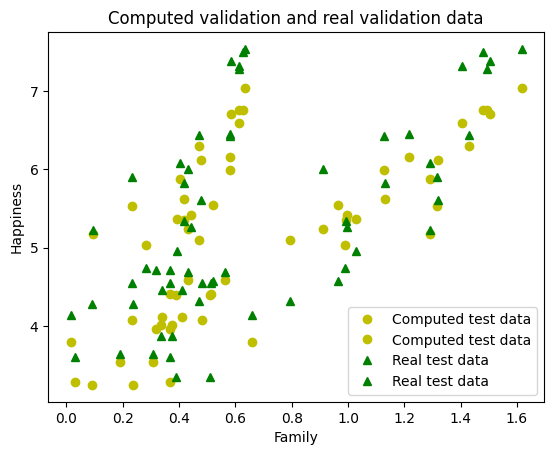

prediction error:  0.2778267436200108


In [ ]:
def main():
  crtDir =  os.getcwd()
  filePath = os.path.join(crtDir, 'data', '/content/dateV1/v1_world-happiness-report-2017.csv')
  columns = "Economy..GDP.per.Capita.,Freedom"
  inputs, outputs = loadData(filePath, columns,'Happiness.Score')
  print('in:  ', inputs[:5])
  print('out: ', outputs[:5])

  # crtDir =  os.getcwd()
  # filePath = os.path.join(crtDir, 'data', '/content/dateV1/v1_world-happiness-report-2017.csv')
  # columns = "Family"
  # inputs, outputs = loadData(filePath, columns,'Happiness.Score')
  # print('in:  ', inputs[:5])
  # print('out: ', outputs[:5])

  flat_inputs = [val for sublist in inputs for val in sublist]
  plotHistogram(flat_inputs, 'GDP and Freedom')
  plotHistogram(outputs, 'Happiness score')

  checkLiniarity(inputs, outputs)

  trainInputs, trainOutputs, validationInputs, validationOutputs = splitData(inputs, outputs)

  plotting(trainInputs, trainOutputs, validationInputs, validationOutputs)

  flat_trainInputs = [val for sublist in trainInputs for val in sublist]
  w0, w1, regressor= modelTraining(trainInputs, trainOutputs)

  liniarGraphRepresentation(trainInputs, trainOutputs, w0, w1)

  computedValidationOutputs=plotComputedOutputs(validationInputs, validationOutputs, regressor)

  meanSquareError(computedValidationOutputs, validationOutputs)

main()





# **Cerinta 2**
Aceleasi functionalitati ca si pentru cerinta 1, dar fara utilizarea bibliotecilor specializate

In [ ]:
def loadDataManual(fileName, inputVariable, outputVariable):
    data = []
    columns = []
    with open(fileName) as file:
      lines = file.readlines()
      for index, line in enumerate(lines):
        if index == 0:
          columns = line.strip().split(',') #we transform the first row into the columns one
        else:
          data.append(line.strip().split(',')) #we append the entire row's info to the data list
    nrLines = len(data)

    allColumns = inputVariable.split(',')
    inputs = []
    for row_idx in range(nrLines):  # Iterate over each row in the dataset
        row_data = []
        for column in allColumns:  # Iterate over each specified input column
            row_data.append(float(data[row_idx][columns.index(column)]))
        inputs.append(row_data)

    selectedOutput = columns.index(outputVariable)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs


In [ ]:
import matplotlib.pyplot as plt  # Import matplotlib module

def plotHistogramManual(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

In [ ]:
#we check the liniarity between the data
def checkLiniarityManual(inputs, outputs):
  plt.plot(inputs, outputs, 'ro')
  plt.xlabel('happiness')
  plt.title('Family vs. happiness')
  plt.show()

In [ ]:
import random
def splitDataManual(inputs, outputs):
  random.seed(5)
  indexes = [i for i in range(len(inputs))]
  random.shuffle(indexes)
  trainSetSize = int(0.8*len(inputs))
  trainSet = []
  for i in range(trainSetSize):
    trainSet.append(indexes[i])
  validationSet = [i for i in indexes if not i in trainSet] #what was left behind in the selection for the training set
  trainInputs = [inputs[i] for i in trainSet] #selects the input instances that correspond with the random indexes in the training set
  trainOutputs = [outputs[i] for i in trainSet] #same shit here
  validationInputs = [inputs[i] for i in validationSet]
  valdationOutputs = [outputs[i] for i in validationSet]
  return trainInputs, trainOutputs, validationInputs, valdationOutputs


In [ ]:
#plotting the whole thing
def plottingManual(trainInputs, trainOutputs, validationInputs, valdationOutputs):
  plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')   #train data are plotted by red and circle sign
  plt.plot(validationInputs,valdationOutputs, 'g^', label = 'validation data')     #test data are plotted by green and a triangle sign
  plt.title('train and validation data')
  plt.xlabel('Family')
  plt.ylabel('happiness')
  plt.legend()
  plt.show()

In [ ]:
def scale_data(data):
    max_value = max(data)
    min_value = min(data)
    scaled_data = [(x - min_value) / (max_value - min_value) for x in data]
    return scaled_data

def modelTrainingManual(trainInputs, trainOutputs, learning_rate=0.01, epochs=1000):
    # Scale the input features
    scaled_trainInputs = [[(x - min(feature)) / (max(feature) - min(feature)) for x in feature] for feature in zip(*trainInputs)]

    # Scale the target outputs
    scaled_trainOutputs = scale_data(trainOutputs)

    w0 = 0.0
    w1 = [0.0] * len(scaled_trainInputs[0])  # Initialize weights with zeros

    for epoch in range(epochs):
        predictions = []
        for i in range(len(scaled_trainInputs)):
            partial_result = w0
            for j in range(len(scaled_trainInputs[0])):
                partial_result += w1[j] * scaled_trainInputs[i][j]
            predictions.append(partial_result)

        # Calculate Mean Absolute Error (MAE) instead of Mean Squared Error (MSE)
        mae = sum(abs(scaled_trainOutputs[k] - predictions[k]) for k in range(len(predictions))) / len(predictions)

        # Update weights using Mean Absolute Error (MAE)
        w0 = w0 - learning_rate * mae
        for j in range(len(scaled_trainInputs[0])):
            error_sum = 0
            for i in range(len(scaled_trainInputs)):
                error_sum += (predictions[i] - scaled_trainOutputs[i]) * scaled_trainInputs[i][j]
            avg_error = error_sum / len(scaled_trainInputs)
            w1[j] -= learning_rate * avg_error

    return w0, w1





In [ ]:
def liniarGraphRepresentationManual(trainInputs, trainOutputs, w0, w1):
    nrPoints = 1000
    xRef = []
    min_val = min([min(inner) for inner in trainInputs])
    max_val = max([max(inner) for inner in trainInputs])
    step = (max_val - min_val) / nrPoints
    val = min_val
    for i in range(nrPoints):
        xRef.append(val)
        val += step
    avgV1 = sum(w1)/len(w1)
    yRef = [w0 + avgV1 * el for el in xRef]

    plt.plot(trainInputs, trainOutputs, 'ro', label='training data')  # train data are plotted by red and circle sign
    plt.plot(xRef, yRef, 'b-', label='learnt model')  # model is plotted by a blue line
    plt.title('train data and the learnt model')
    plt.xlabel('family')
    plt.ylabel('happiness')
    plt.legend()
    plt.show()

In [ ]:
def plotComputedOutputsManual(validationInputs, valdationOutputs, w0, w1):
    computedValidationOutputs = []
    for i in range(len(validationInputs)):
      computedOutput=w0
      for j in range (len(validationInputs[0])):
        computedOutput+=w1[j]* validationInputs[i][j] #calculate a computed output for each data piece
      computedValidationOutputs.append(computedOutput) # creating the list of computed outputs
    # Plot the computed outputs and real outputs
    plt.plot(validationInputs, computedValidationOutputs, 'yo', label='Computed test data')  # Computed test data plotted as yellow circles
    plt.plot(validationInputs, valdationOutputs, 'yo', label='Real test data', marker='^', color='g')  # Real test data plotted as green triangles
    plt.title('Computed validation and real validation data')
    plt.xlabel('Family')
    plt.ylabel('Happiness')
    plt.legend()
    plt.show()
    return computedValidationOutputs

In [ ]:
def meanSquareErrorManual(computedValidationOutputs, valdationOutputs):
  #mean squared error calculated manually
  error = 0.0
  for t1,t2 in zip(computedValidationOutputs, valdationOutputs):
    error += (t1-t2)**2
  error = error/len(valdationOutputs)
  print('prediction error: ', error)

in:   [[1.616463184, 0.635422587], [1.482383013, 0.626006722], [1.48063302, 0.627162635], [1.564979553, 0.620070577], [1.443571925, 0.617950857]]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


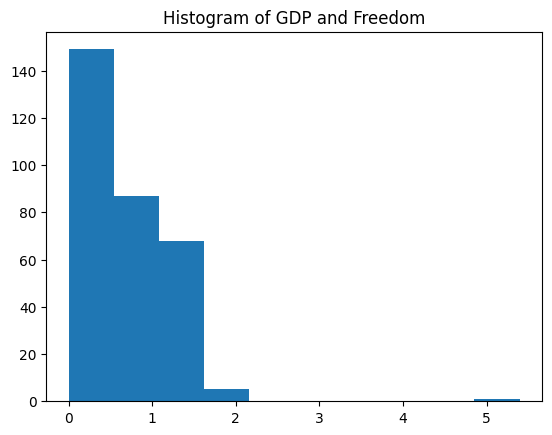

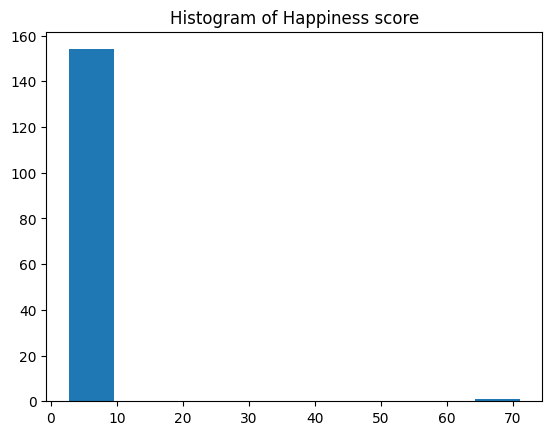

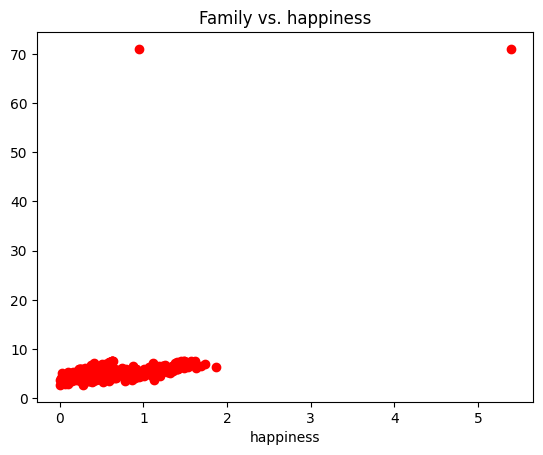

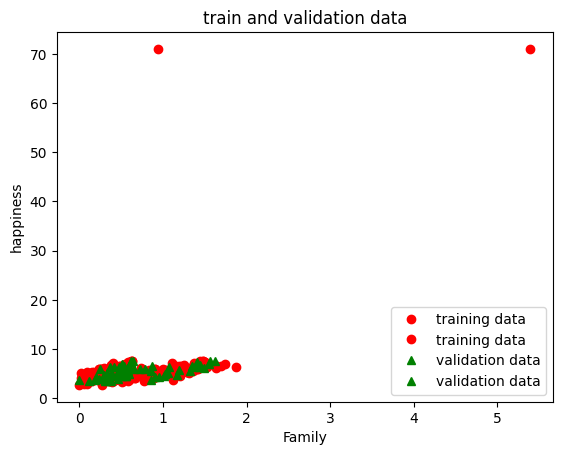

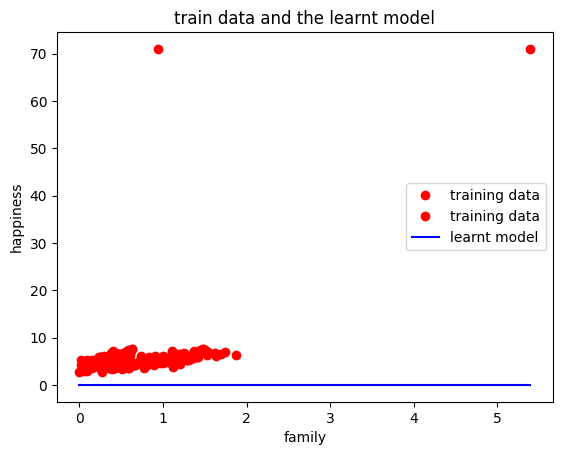

<ipython-input-37-c40ab9de4907>:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "yo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(validationInputs, valdationOutputs, 'yo', label='Real test data', marker='^', color='g')  # Real test data plotted as green triangles
<ipython-input-37-c40ab9de4907>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "yo" (-> color='y'). The keyword argument will take precedence.
  plt.plot(validationInputs, valdationOutputs, 'yo', label='Real test data', marker='^', color='g')  # Real test data plotted as green triangles


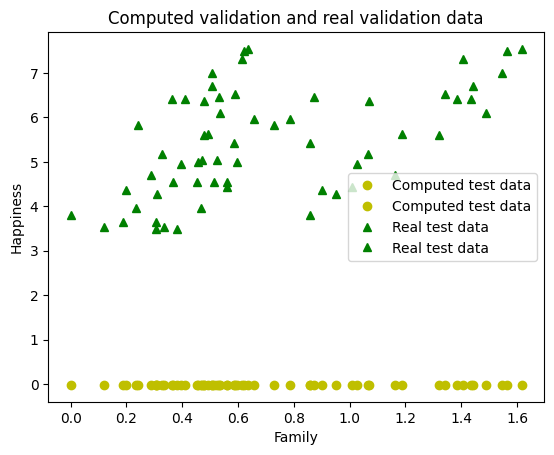

prediction error:  31.032536072629828


In [ ]:
def main():
  columns = "Economy..GDP.per.Capita.,Freedom"
  inputs, outputs = loadDataManual("/content/dateV1/v1_world-happiness-report-2017.csv", columns,'Happiness.Score')
  print('in:  ', inputs[:5])
  print('out: ', outputs[:5])

  # crtDir =  os.getcwd()
  # filePath = os.path.join(crtDir, 'data', '/content/dateV1/v1_world-happiness-report-2017.csv')
  # columns = "Family"
  # inputs, outputs = loadData(filePath, columns,'Happiness.Score')
  # print('in:  ', inputs[:5])
  # print('out: ', outputs[:5])

  flat_inputs = [val for sublist in inputs for val in sublist]
  plotHistogramManual(flat_inputs, 'GDP and Freedom')
  plotHistogramManual(outputs, 'Happiness score')

  checkLiniarityManual(inputs, outputs)

  trainInputs, trainOutputs, validationInputs, validationOutputs = splitDataManual(inputs, outputs)

  plottingManual(trainInputs, trainOutputs, validationInputs, validationOutputs)

  flat_trainInputs = [val for sublist in trainInputs for val in sublist]
  w0, w1= modelTrainingManual(trainInputs, trainOutputs)

  liniarGraphRepresentationManual(trainInputs, trainOutputs, w0, w1)

  computedValidationOutputs=plotComputedOutputsManual(validationInputs, validationOutputs, w0, w1)

  meanSquareErrorManual(computedValidationOutputs, validationOutputs)

main()

In [ ]:
import zipfile
import os

# Path to the zip file
zip_file_path = "/content/v3_world-happiness-report-2017.zip"

# Directory to extract the contents
extract_to_directory = "dateV3"

# Create the directory if it doesn't exist
os.makedirs(extract_to_directory, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

# **Cerinta 3**#
Aplicate functiile pentru setul de date 2 si 3

 - Rezultatele pentru coloana 'Family'

in:   [[1.53352356], [1.551121593], [1.610574007], [1.516911745], [1.540246725]]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


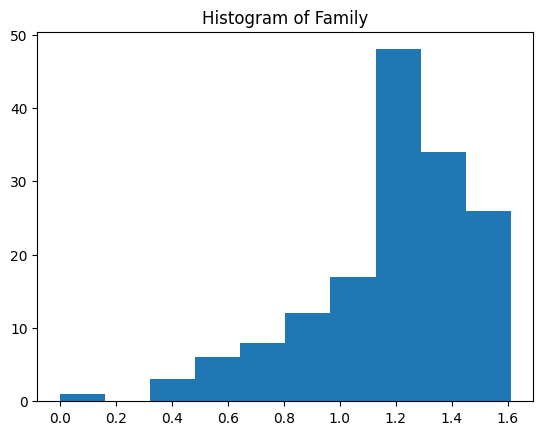

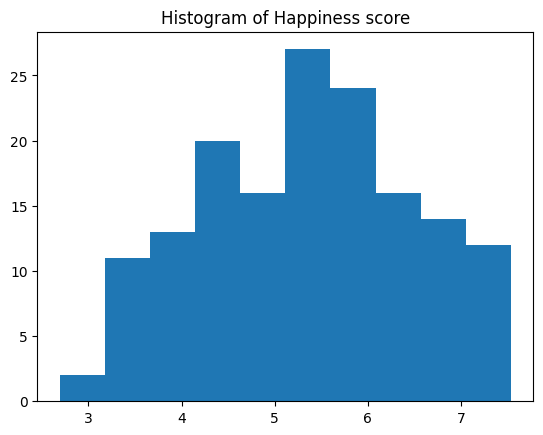

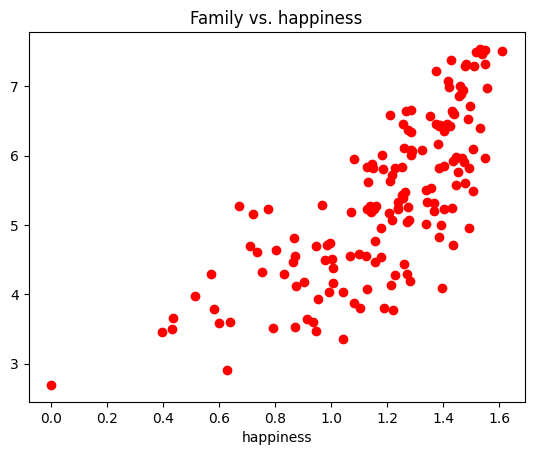

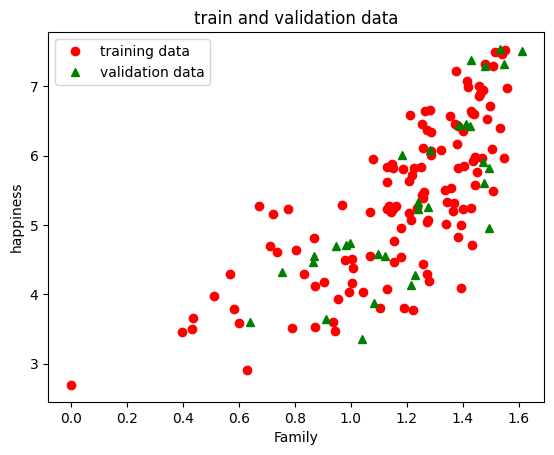

the learnt model: f(x) =  2.039013930022846  +  2.804913617557077  * x


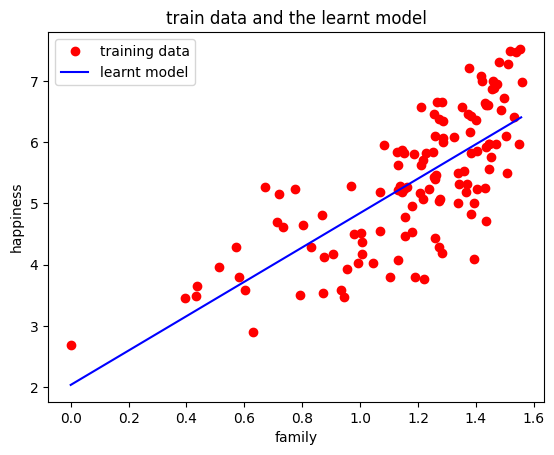

<ipython-input-27-23fdd1447a90>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "yo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(validationInputs, valdationOutputs, 'yo', label='Real test data', marker='^', color='g')  # Real test data plotted as green triangles
<ipython-input-27-23fdd1447a90>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "yo" (-> color='y'). The keyword argument will take precedence.
  plt.plot(validationInputs, valdationOutputs, 'yo', label='Real test data', marker='^', color='g')  # Real test data plotted as green triangles


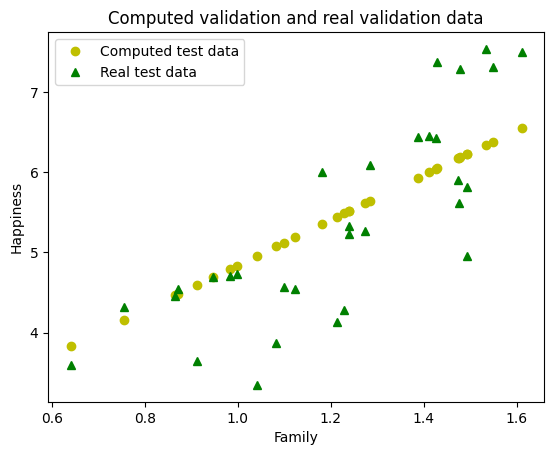

prediction error:  0.6051231125473607


In [ ]:
def main():
  crtDir =  os.getcwd()
  filePath = os.path.join(crtDir, 'data', '/content/dateV2/v2_world-happiness-report-2017.csv')
  columns = "Family"
  inputs, outputs = loadData(filePath, columns,'Happiness.Score')
  print('in:  ', inputs[:5])
  print('out: ', outputs[:5])

  flat_inputs = [val for sublist in inputs for val in sublist]
  plotHistogram(flat_inputs, 'Family')
  plotHistogram(outputs, 'Happiness score')

  checkLiniarity(inputs, outputs)

  trainInputs, trainOutputs, validationInputs, validationOutputs = splitData(inputs, outputs)

  plotting(trainInputs, trainOutputs, validationInputs, validationOutputs)

  flat_trainInputs = [val for sublist in trainInputs for val in sublist]
  w0, w1, regressor= modelTraining(trainInputs, trainOutputs)

  liniarGraphRepresentation(trainInputs, trainOutputs, w0, w1)

  computedValidationOutputs=plotComputedOutputs(validationInputs, validationOutputs, regressor)

  meanSquareError(computedValidationOutputs, validationOutputs)

main()

- Rezultatele pentru coloanele 'Economy..GDP.per.Capita.' si 'Freedom'




in:   [[1.616463184, 0.808231592], [1.482383013, 0.741191506], [1.48063302, 0.74031651], [1.564979553, 0.782489777], [1.443571925, 0.721785963]]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


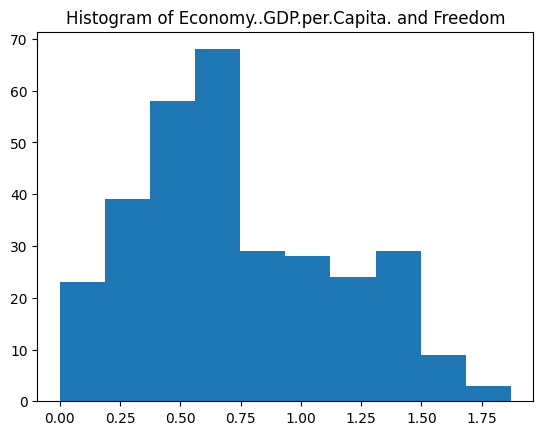

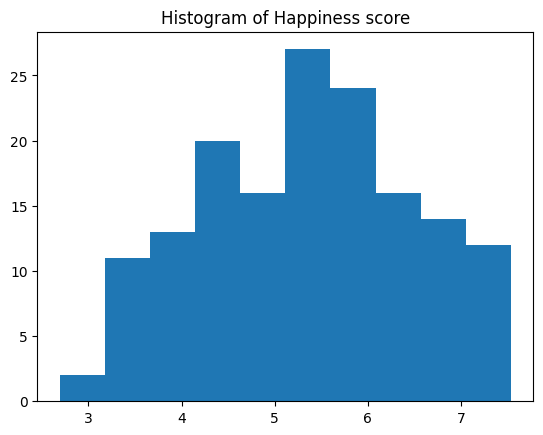

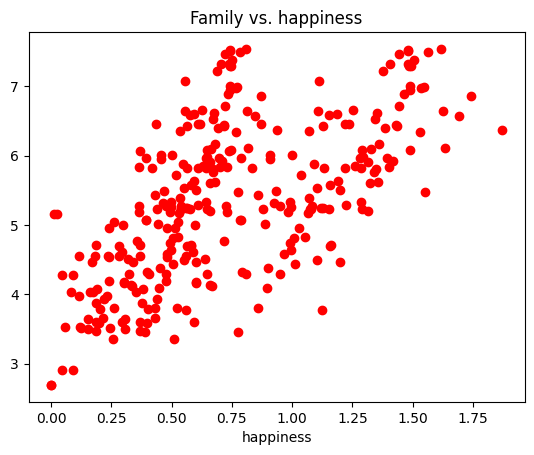

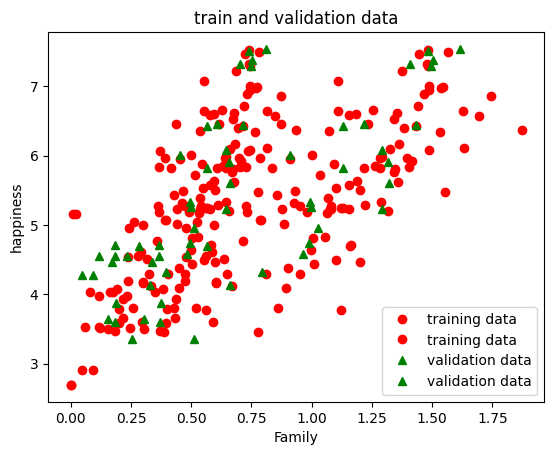

the learnt model: f(x) =  3.2007585989248835  +  -68616.18596733066  * x


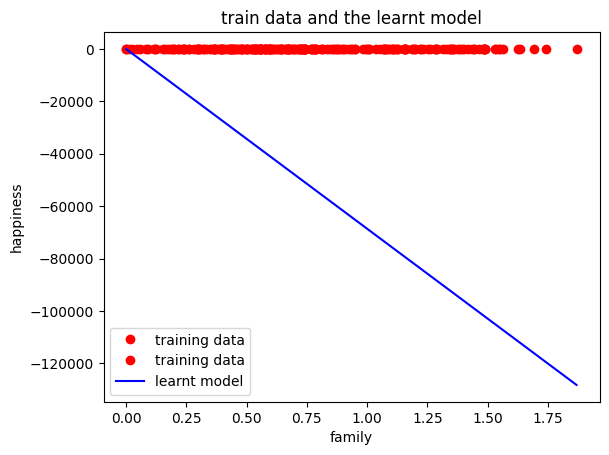

<ipython-input-27-23fdd1447a90>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "yo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(validationInputs, valdationOutputs, 'yo', label='Real test data', marker='^', color='g')  # Real test data plotted as green triangles
<ipython-input-27-23fdd1447a90>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "yo" (-> color='y'). The keyword argument will take precedence.
  plt.plot(validationInputs, valdationOutputs, 'yo', label='Real test data', marker='^', color='g')  # Real test data plotted as green triangles


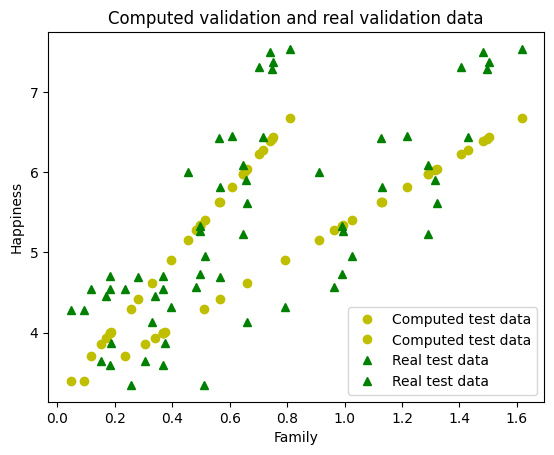

prediction error:  0.41421024295199377


In [ ]:
def main():
  crtDir =  os.getcwd()
  filePath = os.path.join(crtDir, 'data', '/content/dateV2/v2_world-happiness-report-2017.csv')
  columns = "Economy..GDP.per.Capita.,Freedom"
  inputs, outputs = loadData(filePath, columns,'Happiness.Score')
  print('in:  ', inputs[:5])
  print('out: ', outputs[:5])

  flat_inputs = [val for sublist in inputs for val in sublist]
  plotHistogram(flat_inputs, 'Economy..GDP.per.Capita. and Freedom')
  plotHistogram(outputs, 'Happiness score')

  checkLiniarity(inputs, outputs)

  trainInputs, trainOutputs, validationInputs, validationOutputs = splitData(inputs, outputs)

  plotting(trainInputs, trainOutputs, validationInputs, validationOutputs)

  flat_trainInputs = [val for sublist in trainInputs for val in sublist]
  w0, w1, regressor= modelTraining(trainInputs, trainOutputs)

  liniarGraphRepresentation(trainInputs, trainOutputs, w0, w1)

  computedValidationOutputs=plotComputedOutputs(validationInputs, validationOutputs, regressor)

  meanSquareError(computedValidationOutputs, validationOutputs)

main()

- Rezultatele pentru coloana 'Family', setul de date 3

in:   [[1.53352356], [1.551121593], [1.610574007], [1.516911745], [1.540246725]]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


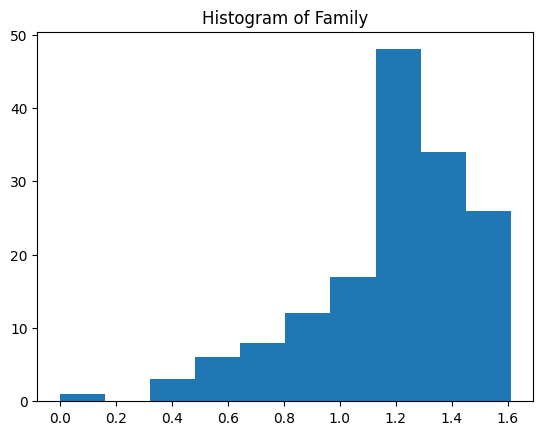

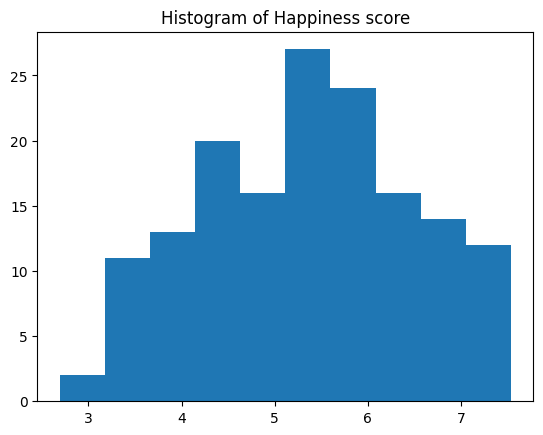

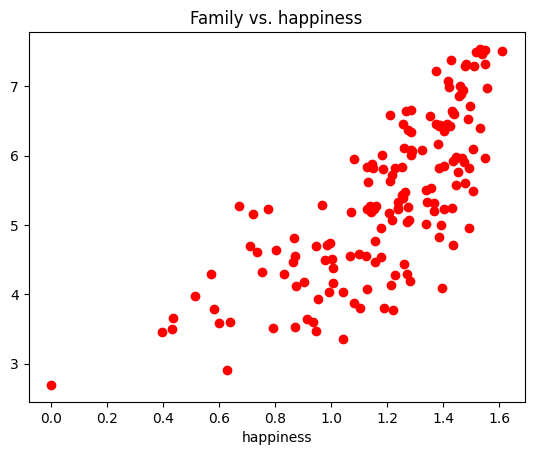

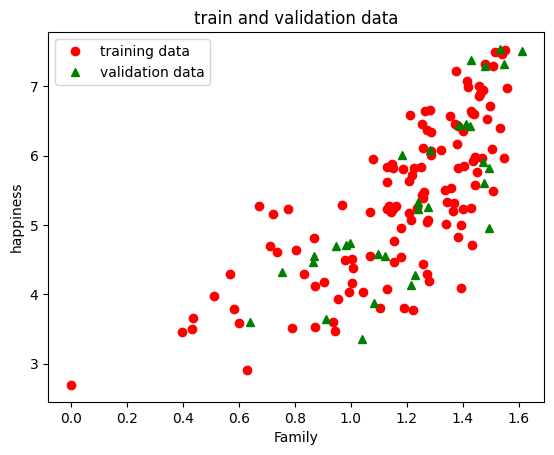

the learnt model: f(x) =  2.039013930022846  +  2.804913617557077  * x


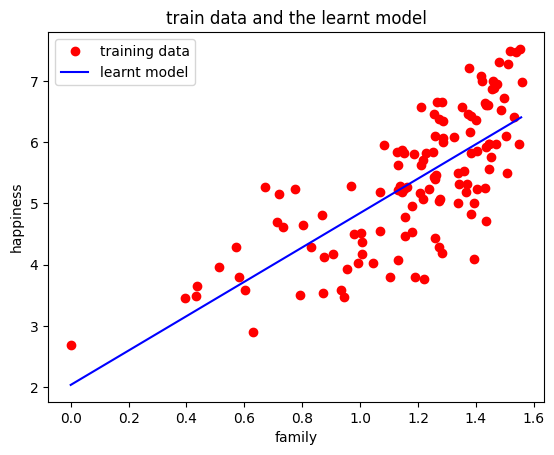

<ipython-input-27-23fdd1447a90>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "yo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(validationInputs, valdationOutputs, 'yo', label='Real test data', marker='^', color='g')  # Real test data plotted as green triangles
<ipython-input-27-23fdd1447a90>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "yo" (-> color='y'). The keyword argument will take precedence.
  plt.plot(validationInputs, valdationOutputs, 'yo', label='Real test data', marker='^', color='g')  # Real test data plotted as green triangles


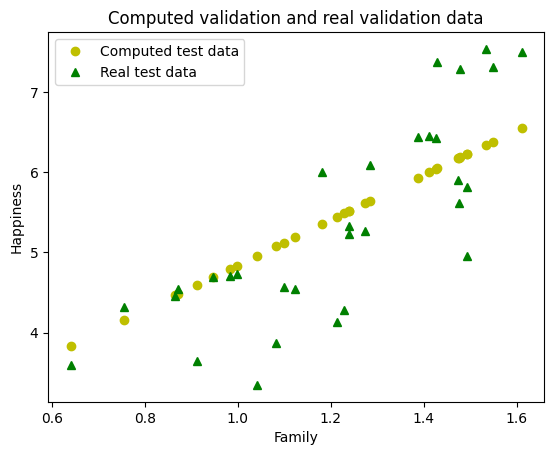

prediction error:  0.6051231125473607


In [ ]:
def main():
  crtDir =  os.getcwd()
  filePath = os.path.join(crtDir, 'data', '/content/dateV3/v3_world-happiness-report-2017.csv')
  columns = "Family"
  inputs, outputs = loadData(filePath, columns,'Happiness.Score')
  print('in:  ', inputs[:5])
  print('out: ', outputs[:5])

  flat_inputs = [val for sublist in inputs for val in sublist]
  plotHistogram(flat_inputs, 'Family')
  plotHistogram(outputs, 'Happiness score')

  checkLiniarity(inputs, outputs)

  trainInputs, trainOutputs, validationInputs, validationOutputs = splitData(inputs, outputs)

  plotting(trainInputs, trainOutputs, validationInputs, validationOutputs)

  flat_trainInputs = [val for sublist in trainInputs for val in sublist]
  w0, w1, regressor= modelTraining(trainInputs, trainOutputs)

  liniarGraphRepresentation(trainInputs, trainOutputs, w0, w1)

  computedValidationOutputs=plotComputedOutputs(validationInputs, validationOutputs, regressor)

  meanSquareError(computedValidationOutputs, validationOutputs)

main()

 - Rezultatele pentru coloanele Economy..GDP.per.Capita. si Freedom, pe setul de date 3


in:   [[1.616463184, 0.635422587], [1.482383013, 0.626006722], [1.48063302, 0.627162635], [1.564979553, 0.620070577], [1.443571925, 0.617950857]]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


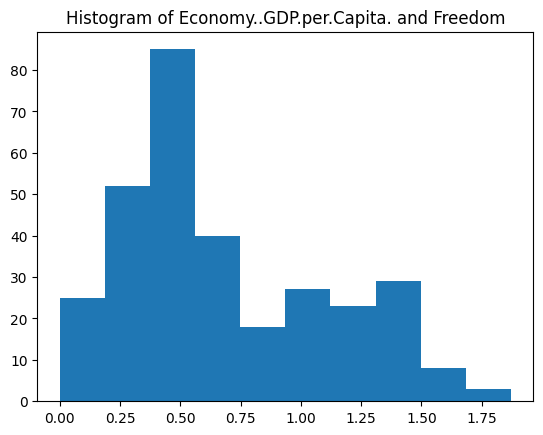

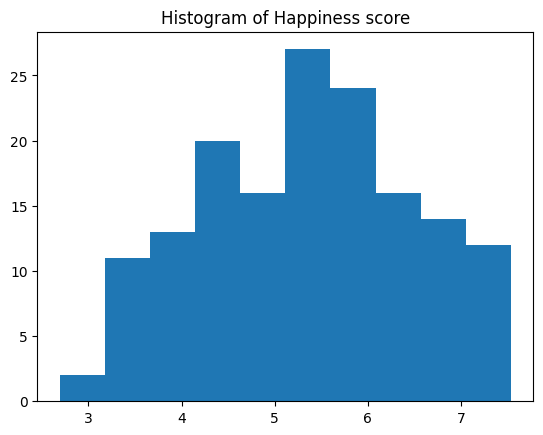

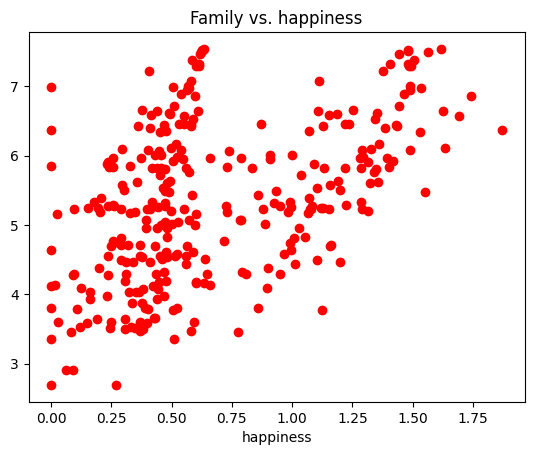

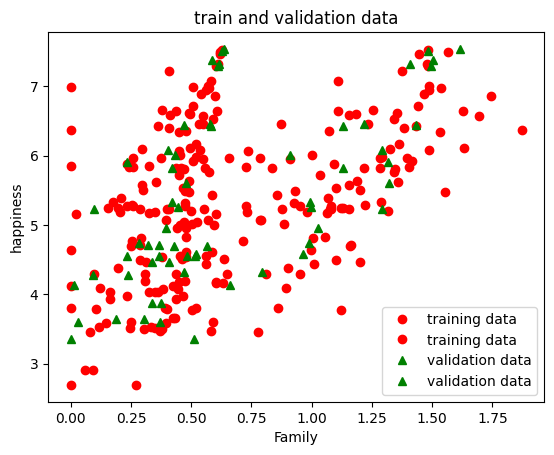

the learnt model: f(x) =  2.7629923406916577  +  1.6238620005617537  * x


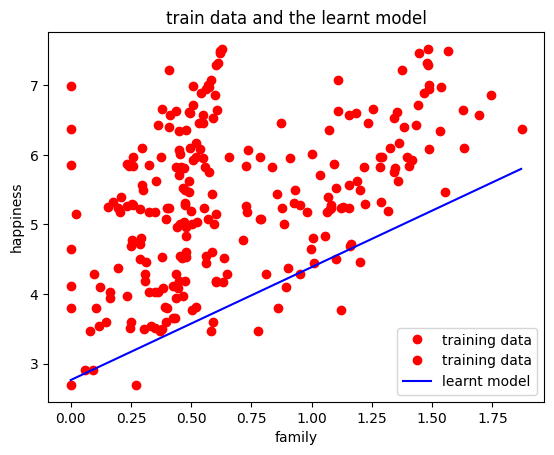

<ipython-input-27-23fdd1447a90>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "yo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(validationInputs, valdationOutputs, 'yo', label='Real test data', marker='^', color='g')  # Real test data plotted as green triangles
<ipython-input-27-23fdd1447a90>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "yo" (-> color='y'). The keyword argument will take precedence.
  plt.plot(validationInputs, valdationOutputs, 'yo', label='Real test data', marker='^', color='g')  # Real test data plotted as green triangles


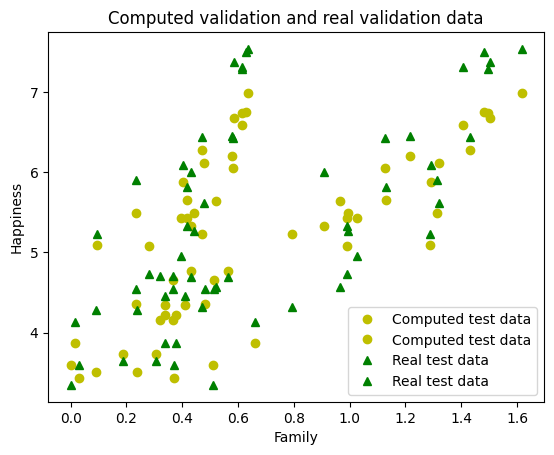

prediction error:  0.22615902602316174


In [ ]:
def main():
  crtDir =  os.getcwd()
  filePath = os.path.join(crtDir, 'data', '/content/dateV3/v3_world-happiness-report-2017.csv')
  columns = "Economy..GDP.per.Capita.,Freedom"
  inputs, outputs = loadData(filePath, columns,'Happiness.Score')
  print('in:  ', inputs[:5])
  print('out: ', outputs[:5])

  flat_inputs = [val for sublist in inputs for val in sublist]
  plotHistogram(flat_inputs, 'Economy..GDP.per.Capita. and Freedom')
  plotHistogram(outputs, 'Happiness score')

  checkLiniarity(inputs, outputs)

  trainInputs, trainOutputs, validationInputs, validationOutputs = splitData(inputs, outputs)

  plotting(trainInputs, trainOutputs, validationInputs, validationOutputs)

  flat_trainInputs = [val for sublist in trainInputs for val in sublist]
  w0, w1, regressor= modelTraining(trainInputs, trainOutputs)

  liniarGraphRepresentation(trainInputs, trainOutputs, w0, w1)

  computedValidationOutputs=plotComputedOutputs(validationInputs, validationOutputs, regressor)

  meanSquareError(computedValidationOutputs, validationOutputs)

main()